In [42]:
import numpy as np
import pandas as pd
import os
import itertools
import os, stat, time
from os.path import dirname as up
import shutil
from PIL import Image
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

base = 'C:/Users/sasha/breast-cancer-classification.zip (Unzipped Files)-20211116T195524Z-001/breast-cancer-classification.zip (Unzipped Files)/breast-cancer-classification/mkdir datasets/original/archive/IDC_regular_ps50_idx5'

ids = os.listdir(base)
data = []

for id in tqdm(ids):

    files1 = os.listdir(base + '/'+id + '/1/')
    files0 = os.listdir(base +'/'+ id + '/0/')
    for x in files1:
      data.append(base + '/'+ id + '/1/' + x)
    for x in files0:
      data.append(base + '/'+ id + '/0/' + x)

len(data)

  0%|          | 0/279 [00:00<?, ?it/s]

277524

In [44]:
import random

random.shuffle(data)
data = data[:20000]
len(data)


20000

In [45]:
import cv2
from tqdm.notebook import tqdm
import keras_preprocessing.image as IMAGE
from PIL import Image

images=[]
labels=[]

for i in tqdm(data):
  label = int(i[-5])
  img = IMAGE.img_to_array(IMAGE.load_img(i, target_size=(50, 50)))
  images.append(img)
  labels.append(label)

  0%|          | 0/20000 [00:00<?, ?it/s]

In [39]:
from sklearn.model_selection import train_test_split

y = np.array(labels)
x = np.stack(images)/255

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, test_size=0.3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(14000, 50, 50, 3) (6000, 50, 50, 3) (14000,) (6000,)


In [46]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)         

In [47]:
import tensorflow as tf

history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, verbose = 2, batch_size = 256)

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 - 18s - loss: 0.5776 - accuracy: 0.7044 - val_loss: 0.5758 - val_accuracy: 0.7258
Epoch 2/100
14000/14000 - 17s - loss: 0.4803 - accuracy: 0.7672 - val_loss: 0.4547 - val_accuracy: 0.7980
Epoch 3/100
14000/14000 - 16s - loss: 0.4491 - accuracy: 0.7949 - val_loss: 0.4527 - val_accuracy: 0.8095
Epoch 4/100
14000/14000 - 16s - loss: 0.4275 - accuracy: 0.8130 - val_loss: 0.4169 - val_accuracy: 0.8210
Epoch 5/100
14000/14000 - 16s - loss: 0.4157 - accuracy: 0.8204 - val_loss: 0.4131 - val_accuracy: 0.8317
Epoch 6/100
14000/14000 - 16s - loss: 0.4056 - accuracy: 0.8243 - val_loss: 0.4550 - val_accuracy: 0.7967
Epoch 7/100
14000/14000 - 16s - loss: 0.4048 - accuracy: 0.8250 - val_loss: 0.3960 - val_accuracy: 0.8345
Epoch 8/100
14000/14000 - 16s - loss: 0.3978 - accuracy: 0.8284 - val_loss: 0.3948 - val_accuracy: 0.8288
Epoch 9/100
14000/14000 - 16s - loss: 0.4030 - accuracy: 0.8222 - val_loss: 0.4206 - val_accuracy: 0.82

Epoch 78/100
14000/14000 - 15s - loss: 0.3332 - accuracy: 0.8575 - val_loss: 0.3481 - val_accuracy: 0.8515
Epoch 79/100
14000/14000 - 14s - loss: 0.3353 - accuracy: 0.8570 - val_loss: 0.3449 - val_accuracy: 0.8605
Epoch 80/100
14000/14000 - 15s - loss: 0.3394 - accuracy: 0.8579 - val_loss: 0.3525 - val_accuracy: 0.8540
Epoch 81/100
14000/14000 - 15s - loss: 0.3384 - accuracy: 0.8571 - val_loss: 0.3588 - val_accuracy: 0.8502
Epoch 82/100
14000/14000 - 15s - loss: 0.3300 - accuracy: 0.8612 - val_loss: 0.3506 - val_accuracy: 0.8525
Epoch 83/100
14000/14000 - 16s - loss: 0.3335 - accuracy: 0.8588 - val_loss: 0.3492 - val_accuracy: 0.8528
Epoch 84/100
14000/14000 - 15s - loss: 0.3267 - accuracy: 0.8631 - val_loss: 0.3458 - val_accuracy: 0.8548
Epoch 85/100
14000/14000 - 15s - loss: 0.3294 - accuracy: 0.8585 - val_loss: 0.3494 - val_accuracy: 0.8535
Epoch 86/100
14000/14000 - 15s - loss: 0.3318 - accuracy: 0.8596 - val_loss: 0.3431 - val_accuracy: 0.8538
Epoch 87/100
14000/14000 - 16s - loss

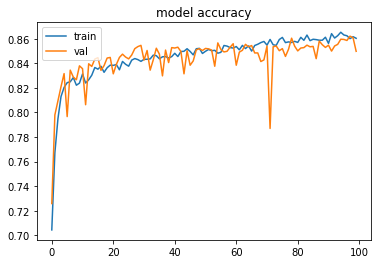

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

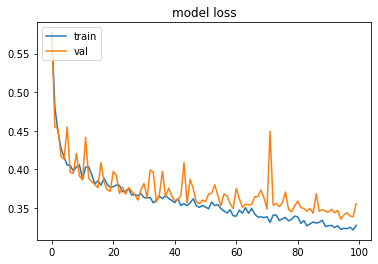

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()